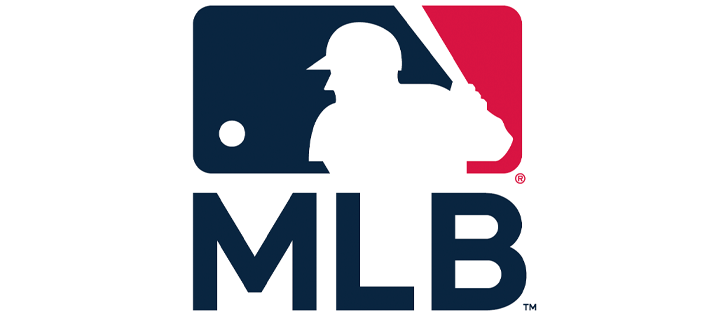

### [Intro]
### This code is EDA for MLB dataset. I want to gain some information and knowledge through this notebook.

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

## 1. awards.csv

In [ ]:
awards = pd.read_csv('../input/mlb-player-digital-engagement-forecasting/awards.csv')

In [ ]:
awards['awardDate'] = pd.to_datetime(awards['awardDate'])
awards['awardsMonth'] = awards['awardDate'].dt.month
awards['awardsDay'] = awards['awardDate'].dt.day

In [ ]:
awards.head()

#### We can see a sharp increase in the number of winners since 2009.

In [ ]:
fig = go.Figure(go.Scatter(x = awards.groupby(['awardSeason']).size().index, y = awards.groupby(['awardSeason']).size().values))
fig.show()

#### You can see top 10 player through below bar graph.

In [ ]:
fig = go.Figure(go.Bar(x = awards['playerName'].value_counts().head(10).index, y = awards['playerName'].value_counts().head(10).values))
fig.show()

## 2. players.csv

In [ ]:
players = pd.read_csv('../input/mlb-player-digital-engagement-forecasting/players.csv')
players.head()

In [ ]:
player_awards = pd.merge(awards,players, how='outer',on='playerId')

In [ ]:
player_awards.head()

In [ ]:
player_awards_1 = player_awards.dropna(subset=['playerName_x'])

#### You can see awards-count by position through below bar graph.

In [ ]:
fig = go.Figure(go.Bar(x=player_awards_1['primaryPositionName'].value_counts().index[0:10], y=player_awards_1['primaryPositionName'].value_counts().values))
fig.show()

## 3. season.csv

In [ ]:
seasons = pd.read_csv('../input/mlb-player-digital-engagement-forecasting/seasons.csv')
seasons.head()

## 4. teams.csv

In [ ]:
teams = pd.read_csv('../input/mlb-player-digital-engagement-forecasting/teams.csv')
teams.head()

## 5. train.csv

In [ ]:
train = pd.read_csv('../input/mlb-player-digital-engagement-forecasting/train.csv')
train.head()

In [ ]:
def json_to_dataframe(data, column):
    data_list = []
    
    for row in range(data.shape[0]):
        
        json_data = data.loc[row, column]
        if str(json_data) != "nan":
            df = pd.read_json(json_data)
            data_list.append(df)
        
    all_data = pd.concat(data_list, axis = 0)
    
    return all_data

In [ ]:
%%time
nextDayPlayerEngagement = json_to_dataframe(train,'nextDayPlayerEngagement')
rosters = json_to_dataframe(train,'rosters')
transactions = json_to_dataframe(train,'transactions')
playerTwitterFollowers = json_to_dataframe(train,'playerTwitterFollowers')
teamTwitterFollowers = json_to_dataframe(train,'teamTwitterFollowers')

### Working.....